In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
from google.colab import files
df=files.upload()

ModuleNotFoundError: No module named 'google'

In [0]:
import io
df=pd.read_csv(io.StringIO(df['Final.csv'].decode('utf-8')))

In [0]:
# One Hot Encoding for cataegorical features like route
from sklearn.preprocessing import LabelEncoder

data = df['route']
values= np.array(data)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

df1 = pd.DataFrame.from_records(onehot_encoded)
df = pd.concat((df,df1),axis=1)

In [0]:
# One Hot Encoding for cataegorical features like carrier
from sklearn.preprocessing import LabelEncoder

data1 = data['Carrier']
values1 = np.array(data1)

label_encoder1 = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(values1)

from sklearn.preprocessing import OneHotEncoder

onehot_encoder1 = OneHotEncoder(sparse=False)
integer_encoded1 = integer_encoded1.reshape(len(integer_encoded1), 1)
onehot_encoded1 = onehot_encoder1.fit_transform(integer_encoded1)

df2 = pd.DataFrame.from_records(onehot_encoded1)
df = pd.concat((df,df2),axis=1)

In [ ]:
df.head

In [0]:
import pandas as pd
data = pd.read_csv("fit.csv")

In [0]:
data

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,C_Market Share,C_Load Factor,C_On Time Performance Rating,D_DewPointC,D_WindGustKmph,D_cloudcover,D_humidity,D_precipMM,D_pressure,D_tempC,D_visibility,D_winddirDegree,D_windspeedKmph,D_Time,A_DewPointC,A_WindGustKmph,A_cloudcover,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,BLR-BOM,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
0,7.50,8.6,9.2,7.29,6.2,9.0,8.0,79.0,-16.0,7.4,4.0,86.0,89.1,9.0,16.0,0.0,36.0,0.0,1011.0,26.0,10.0,176.0,12.0,5.0,22.0,4.0,34.0,62.0,0.0,1009.0,30.0,10.0,77.0,2.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.50,8.6,9.2,7.29,6.2,9.0,3.0,81.0,-20.0,7.4,4.0,86.0,89.1,17.0,14.0,5.0,60.0,0.0,1011.0,26.0,10.0,220.0,11.0,5.0,25.0,7.0,6.0,74.0,0.0,1009.0,30.0,10.0,197.0,6.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.50,8.6,9.2,7.29,6.2,9.0,2.0,90.0,-12.0,7.4,4.0,86.0,89.1,18.0,14.0,25.0,61.0,0.0,1012.0,26.0,10.0,202.0,11.0,5.0,21.0,18.0,5.0,64.0,0.0,1012.0,29.0,10.0,345.0,15.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7.50,8.6,9.2,7.29,6.2,9.0,3.0,77.0,-23.0,7.4,4.0,86.0,89.1,19.0,8.0,69.0,62.0,0.0,1011.0,27.0,9.0,242.0,6.0,5.0,22.0,14.0,3.0,69.0,0.0,1012.0,28.0,10.0,240.0,12.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7.50,8.6,9.2,7.29,6.2,9.0,15.0,78.0,-11.0,7.4,4.0,86.0,89.1,20.0,14.0,66.0,70.0,0.8,1010.0,26.0,8.0,235.0,10.0,5.0,24.0,11.0,0.0,66.0,0.0,1010.0,31.0,10.0,45.0,10.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,7.99,7.3,9.1,8.27,7.8,9.0,27.0,114.0,2.0,9.2,3.6,81.8,89.0,4.0,19.0,0.0,54.0,0.0,1018.0,14.0,10.0,311.0,17.0,7.0,15.0,13.0,0.0,58.0,0.0,1017.0,24.0,10.0,112.0,12.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14948,7.99,7.3,9.1,8.27,7.8,9.0,17.0,103.0,-20.0,9.2,3.6,81.8,89.0,2.0,21.0,0.0,46.0,0.0,1017.0,13.0,10.0,301.0,18.0,7.0,14.0,10.0,2.0,48.0,0.0,1016.0,26.0,10.0,85.0,9.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14949,7.99,7.3,9.1,8.27,7.8,9.0,3.0,111.0,-26.0,9.2,3.6,81.8,89.0,2.0,7.0,2.0,39.0,0.0,1017.0,16.0,10.0,282.0,6.0,7.0,14.0,9.0,3.0,51.0,0.0,1015.0,25.0,10.0,108.0,8.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14950,7.99,7.3,9.1,8.27,7.8,9.0,25.0,113.0,-2.0,9.2,3.6,81.8,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
# Feature Importance Score
from sklearn import preprocessing

X = data.drop('A_Delay', axis =1)
y = data['A_Delay'].to_numpy().reshape(-1,1)

lab_enc = preprocessing.LabelEncoder()
y_encoded = lab_enc.fit_transform(y)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)
model.fit(X,y_encoded)

print(model.feature_importances_ * 100)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.76721696 1.0596435  0.51925399 0.55456825 0.96692908 0.63659722
 4.88504991 4.43234702 0.98814766 1.29947313 1.39922998 0.78969411
 3.76010847 4.0636994  3.99377419 4.13850663 1.45826329 3.85528585
 3.82823478 1.46237099 4.58247792 4.04352762 2.43305636 3.9912313
 3.66661773 4.18177311 3.99187416 1.23462183 4.00889648 4.14097175
 1.35587495 4.48921738 3.82360421 2.76719088 0.3661315  0.36551824
 0.38215958 0.53879223 0.55453445 0.70404692 0.88595213 0.6109495
 0.99423944 0.38955119 0.63879472]


In [0]:
# Removing Data Leakage
data = data.drop("D_Delay",axis = 1)

In [0]:
# Outlier Removal
data = data[data['A_Delay'] < 180]
data = data[data['A_Delay'] > -180]

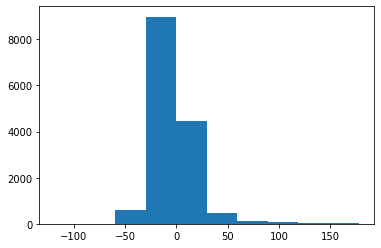

In [0]:
# Looking at the Target
plt.hist(data['A_Delay'])
plt.show()


In [0]:
# Data Description post out-lier removal
pd.options.display.max_columns = None
data.describe()

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,Duration,A_Delay,C_Rating,C_Market Share,C_Load Factor,C_On Time Performance Rating,D_DewPointC,D_WindGustKmph,D_cloudcover,D_humidity,D_precipMM,D_pressure,D_tempC,D_visibility,D_winddirDegree,D_windspeedKmph,D_Time,A_DewPointC,A_WindGustKmph,A_cloudcover,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,BLR-BOM,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
count,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000,14733.000000
mean,7.458336,8.039754,9.033333,7.919271,7.201660,9.060012,114.468665,-3.630418,7.527510,13.277547,86.856916,83.084443,16.972177,15.547051,29.087699,60.898353,0.105309,988.126417,25.014190,9.809121,187.530747,12.084402,6.883052,14.671581,13.750981,24.979018,45.932795,0.115750,986.097876,28.036449,9.789181,192.339985,11.066178,8.709903,0.201181,0.210887,0.107446,0.266884,0.213466,0.127130,0.239530,0.168805,0.155841,0.116948,0.191746
std,0.340949,0.817545,0.201407,0.339127,0.546549,0.051417,30.721368,20.561589,0.919875,11.894891,5.411860,8.626182,6.444734,9.360563,28.387186,20.700156,0.395379,147.831372,6.497154,2.257138,90.797693,6.627040,3.637032,7.772274,10.008730,28.722105,22.269785,0.525823,150.575592,7.876755,2.256123,98.330304,6.769901,3.721376,0.400897,0.407952,0.309690,0.442346,0.409768,0.333129,0.426811,0.374592,0.362716,0.321370,0.393688
min,7.000000,6.200000,8.700000,7.290000,6.200000,9.000000,0.000000,-119.000000,6.600000,3.600000,80.750000,70.300000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.290000,7.300000,9.000000,7.990000,7.300000,9.000000,100.000000,-15.000000,6.800000,4.000000,81.800000,74.700000,14.000000,9.000000,3.000000,48.000000,0.000000,1007.000000,22.000000,10.000000,107.000000,8.000000,5.000000,8.410000,8.000000,2.000000,28.000000,0.000000,1004.000000,24.000000,10.000000,111.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.500000,8.500000,9.100000,7.990000,7.300000,9.100000,114.000000,-6.000000,7.200000,12.000000,86.000000,87.400000,18.000000,14.000000,20.000000,65.000000,0.000000,1011.000000,25.000000,10.000000,195.000000,11.000000,6.000000,16.000000,11.000000,11.000000,45.000000,0.000000,1010.000000,28.000000,10.000000,199.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.500000,8.600000,9.200000,7.990000,7.300000,9.100000,135.000000,4.000000,7.900000,13.100000,93.300000,89.100000,22.000000,19.000000,51.000000,77.000000,0.000000,1014.000000,29.000000,10.000000,262.000000,15.000000,7.000000,22.000000,17.000000,45.000000,64.000000,0.000000,1014.000000,33.000000,10.000000,283.000000,14.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.270000,8.600000,9.200000,8.610000,8.270000,9.190000,1434.000000,178.000000,9.200000,39.700000,93.900000,91.800000,29.000000,82.000000,100.000000,94.000000,9.000000,1029.010000,45.000000,20.000000,360.000000,56.000000,23.000000,29.000000,82.00

In [0]:
# Looking at the columns..
data.columns


Index(['D_Airport Rating', 'D_Airport On Time Rating',
       'D_Airport Service Rating', 'A_Airport Rating',
       'A_Airport On Time Rating', 'A_Airport Service Rating', 'Duration',
       'A_Delay', 'C_Rating', 'C_Market Share', 'C_Load Factor',
       'C_On Time Performance Rating', 'D_DewPointC', 'D_WindGustKmph',
       'D_cloudcover', 'D_humidity', 'D_precipMM', 'D_pressure', 'D_tempC',
       'D_visibility', 'D_winddirDegree', 'D_windspeedKmph', 'D_Time',
       'A_DewPointC', 'A_WindGustKmph', 'A_cloudcover', 'A_humidity',
       'A_precipMM', 'A_pressure', 'A_tempC', 'A_visibility',
       'A_winddirDegree', 'A_windspeedKmph', 'A_Time', 'BLR-BOM', 'BLR-DEL',
       'BOM-DEL', 'CCU-DEL', 'DEL-HYD', 'Air Asia', 'Air India', 'Go Air',
       'Indigo', 'Spicejet', 'Vistara'],
      dtype='object')

In [0]:
# AVERAGE DELAYS OF AIRLINES
print(abs(data[data['Air Asia'] == 1]['A_Delay']).sum()/1873)
print(abs(data[data['Air India'] == 1]['A_Delay']).sum()/3529)
print(abs(data[data['Indigo'] == 1]['A_Delay']).sum()/2296)
print(abs(data[data['Vistara'] == 1]['A_Delay']).sum()/2825)
print(abs(data[data['Spicejet'] == 1]['A_Delay']).sum()/1723)
print(abs(data[data['Go Air'] == 1]['A_Delay']).sum()/2487)

12.59586225306994
14.678379144233494
20.692073170731707
12.523893805309735
16.52930934416715
11.02854845195014


In [0]:
# WE MAKE 4 POSSIBLE SETS OF DATA
# 1 - NO CHANGE IN FEATURES, NO CHANGE IN TARGET 
# 2 - POLYNOMIAL FEATURES OF DEGREE 2, NO CHANGE IN TARGET
# 3 - NO CHANGE IN FEATURES, TARGET NORMALIZED
# 4 - POLYNOMIAL FEATURES OF DEGREE 2, TARGET NORMALIZED

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
PT = PowerTransformer(method = "yeo-johnson")
X_train,X_test,y_train,y_test = tts(data.drop('A_Delay', axis = 1),data['A_Delay'],test_size = 0.3,random_state = 1)

PT.fit(y_train.to_numpy().reshape(-1,1))
lamb = PT.lambdas_

yt_train = PT.transform(y_train.to_numpy().reshape(-1,1))
yt_test = PT.transform(y_test.to_numpy().reshape(-1,1))

from sklearn.preprocessing import PolynomialFeatures
PF = PolynomialFeatures(2);

data_p = PF.fit_transform(data.drop('A_Delay',axis = 1))

Xp_train,Xp_test,y_train,y_test = tts(data_p,data['A_Delay'],test_size = 0.3,random_state = 1)

In [0]:
# Printing all shapes to be sure!
print(X_train.shape) # NO CHANGE APPLIED
print(X_test.shape)  # NO CHANGE APPLIED
print(y_train.shape) # NO CHANGE APPLIED
print(y_test.shape)  # NO CHANGE APPLIED
print(Xp_train.shape)# POLYNOMIAL FEATURES
print(Xp_test.shape) # POLYNOMIAL FEATURES
print(yt_train.shape)# TARGET NORMALIZED
print(yt_test.shape) # TARGET NORMALIZED


(10313, 44)
(4420, 44)
(10313,)
(4420,)
(10313, 1035)
(4420, 1035)
(10313, 1)
(4420, 1)


In [0]:
# Applying random forest regression on the data.
# Evaluation Metric used is mse.

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# NO CHANGE DATA
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train,y_train)
print(mean_squared_error(RFR.predict(X_train),y_train))
print(mean_squared_error(RFR.predict(X_test),y_test))

# TARGET NORMALIZED
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train,yt_train)
print(mean_squared_error(RFR.predict(X_train),yt_train))
print(mean_squared_error(RFR.predict(X_test),yt_test))

# POLYNOMIAL FEATURES AND NO NORMALIZATION OF TARGET
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,y_train)
print(mean_squared_error(RFR.predict(Xp_train),y_train))
print(mean_squared_error(RFR.predict(Xp_test),y_test))

# BOTH POLYNOMIAL AND NORMALIZATION APPLIED
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,yt_train)
print(mean_squared_error(RFR.predict(Xp_train),yt_train))
print(mean_squared_error(RFR.predict(Xp_test),yt_test))


38.41082497779524
107.73722371173395


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.07921334868217828
0.2578073033868724
30.00435866561534
101.20692011421443


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.063407798641229
0.25030577094509837


In [0]:
# SELECTING BEST 60 FEATURES BY SelecKBest

from sklearn.feature_selection import SelectKBest ,mutual_info_regression
SKB = SelectKBest(mutual_info_regression,60)

SKB.fit(Xp_train,y_train)
Xp60_train = SKB.transform(Xp_train)
Xp60_test = SKB.transform(Xp_test)

SKB.fit(Xp_train,yt_train)
Xpt60_train = SKB.transform(Xp_train)
Xpt60_test = SKB.transform(Xp_test)

print(Xp60_train.shape)
print(Xp60_test.shape)
print(Xpt60_train.shape)
print(Xpt60_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(10313, 60)
(4420, 60)
(10313, 60)
(4420, 60)


In [0]:
print(Xp60_train.shape)
print(Xp60_test.shape)
(Xp60_train == Xpt60_train)

(10313, 60)
(4420, 60)


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [0]:
# POLYNOMIAL REDUCED TO 60 FEATURES AND Y WITHOUT NORMALIZATION
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xp60_train,y_train)
print(mean_squared_error(RFR.predict(Xp60_train),y_train))
print(mean_squared_error(RFR.predict(Xp60_test),y_test))

# POLYNOMIAL REDUCED TO 60 FEATURES AND Y WITH NORMALIZATION
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(Xpt60_train,yt_train)
print(mean_squared_error(RFR.predict(Xpt60_train),yt_train))
print(mean_squared_error(RFR.predict(Xpt60_test),yt_test))

60.217648962875295
105.9436047999162


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


0.13783012802053835
0.2532220962569266


In [0]:
# TRYING SUPPORT VECTOR MACHINE ON THE DATA

from sklearn.svm import SVR
svr = SVR(kernel = 'poly',degree = 1, C = 1.0 , max_iter = 10000)

In [0]:
svr.fit(Xp60_train,yt_train)
print(mean_squared_error(svr.predict(Xp60_train),yt_train))
print(mean_squared_error(svr.predict(Xp60_test),yt_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.1667758409532987
0.8210629135613802


In [0]:
# WE TAKE THE PREDICTED VALUES FROM THE SVR AND USE IT AS A FEATURE IN RANDOM FOREST REGRESSION

X_train_svm = np.concatenate([Xp60_train,svr.predict(Xp60_train).reshape(10313,1)],axis = 1)
X_test_svm = np.concatenate([Xp60_test,svr.predict(Xp60_test).reshape(4420,1)],axis = 1)

data_svm = np.concatenate([X_train_svm,X_test_svm],axis = 0)

In [0]:
# TRAINING RFR ON THE MODIFIED DATASET
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = 'auto',n_jobs = -1, random_state = 1)
RFR.fit(X_train_svm,yt_train)
print(mean_squared_error(RFR.predict(X_train_svm),yt_train))
print(mean_squared_error(RFR.predict(X_test_svm),yt_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.1264725628541487
0.24969577516553274


In [0]:
g1 = PT.inverse_transform(RFR.predict(X_test_svm).reshape(-1,1)).reshape(-1,)
g2 = PT.inverse_transform(yt_test.reshape(-1,1)).reshape(-1,)

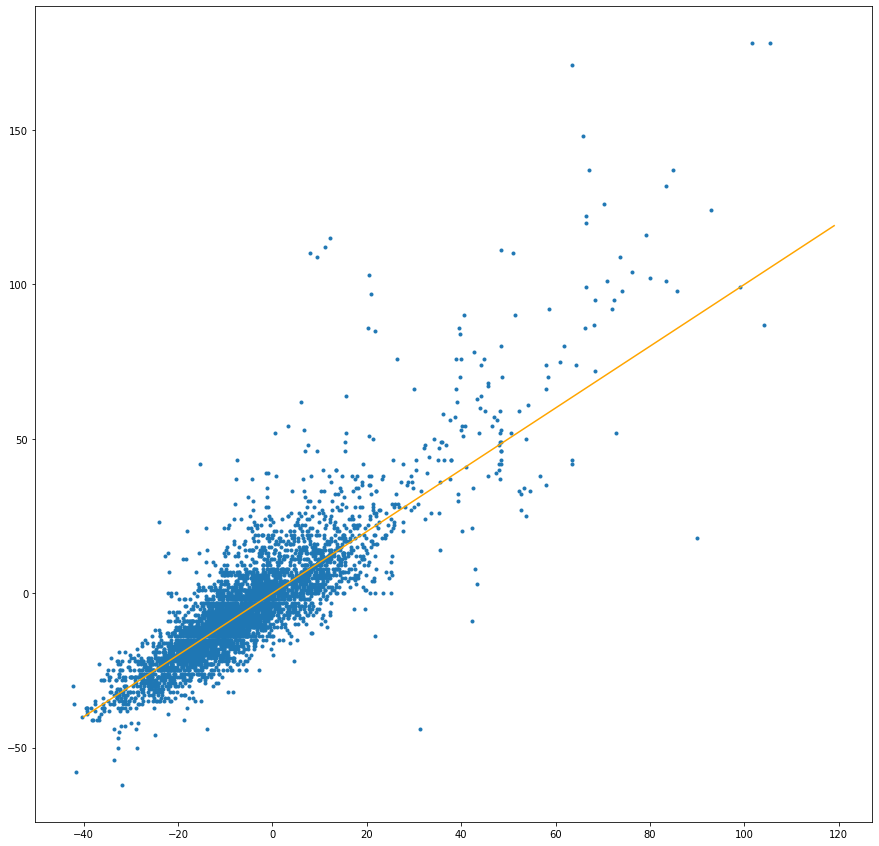

In [0]:
# LOOKING AT THE PREDICTIONS VISUALLY
# PREDICTED VS ACTUAL GRAPH
# y = x line (ORANGE)

plt.figure(figsize=(15,15))
plt.plot(np.arange(-40,120),np.arange(-40,120), color = 'orange')
plt.scatter(g1,g2, marker = '.')